#Introduction

This project explores how various factors—such as study habits, attendance, past academic records, and demographics—affect student performance. Using this dataset, we will build a predictive model to identify students at risk and help educators make data-driven decisions to improve learning outcomes.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


###EDA

In [3]:
df.shape

(6607, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [13]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

categorical_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income','Teacher_Quality', 'School_Type',
    'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level','Distance_from_Home','Gender'
]

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


###Data Visualization

<Figure size 1000x600 with 0 Axes>

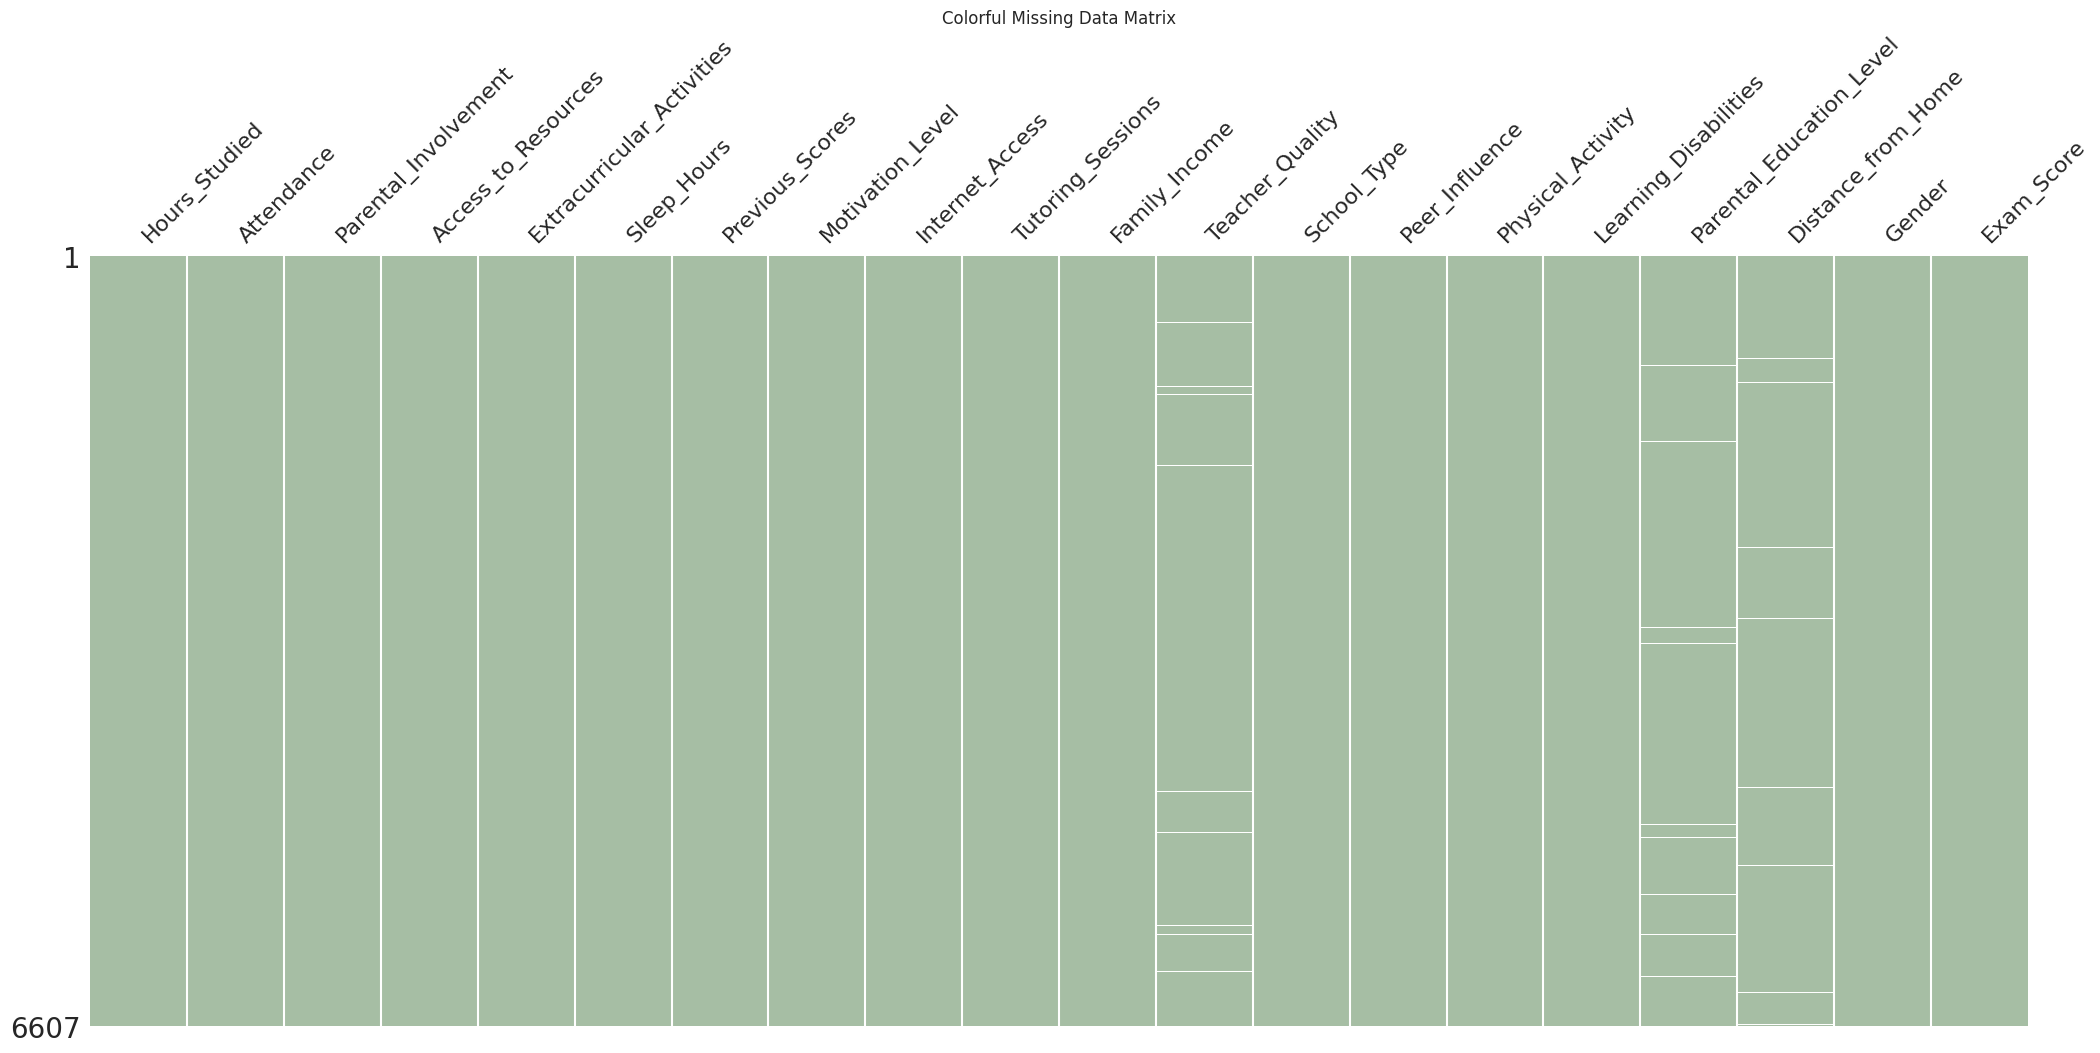

In [9]:
# Visualize the missing data with a matrix plot
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

msno.matrix(df, sparkline=False, color=(0.651, 0.749, 0.647))
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.title("Colorful Missing Data Matrix")
plt.show()

In [14]:
missing_cols = ['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']

for col in missing_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [34]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


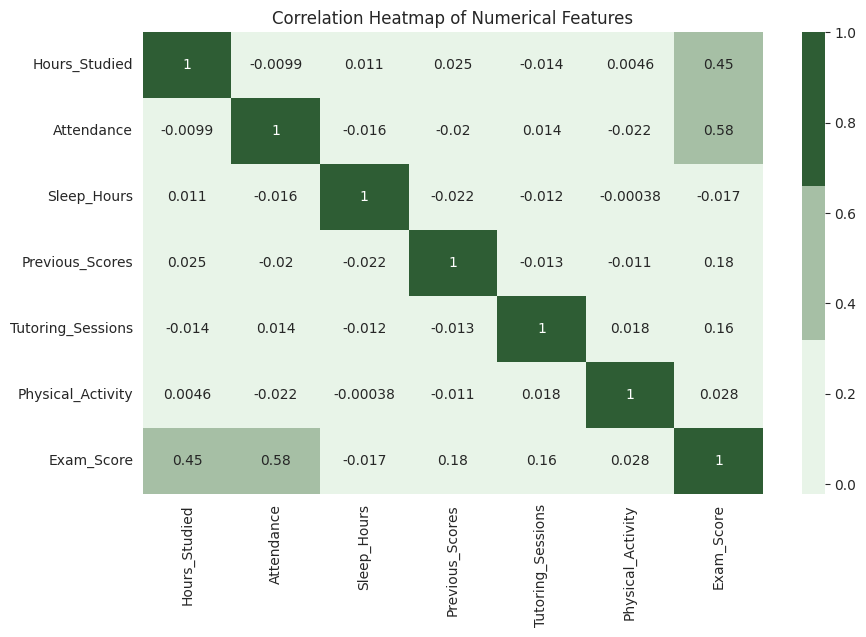

In [35]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True,
            cmap=["#e8f4e8", "#a6bfa5", "#2e5d34"])

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

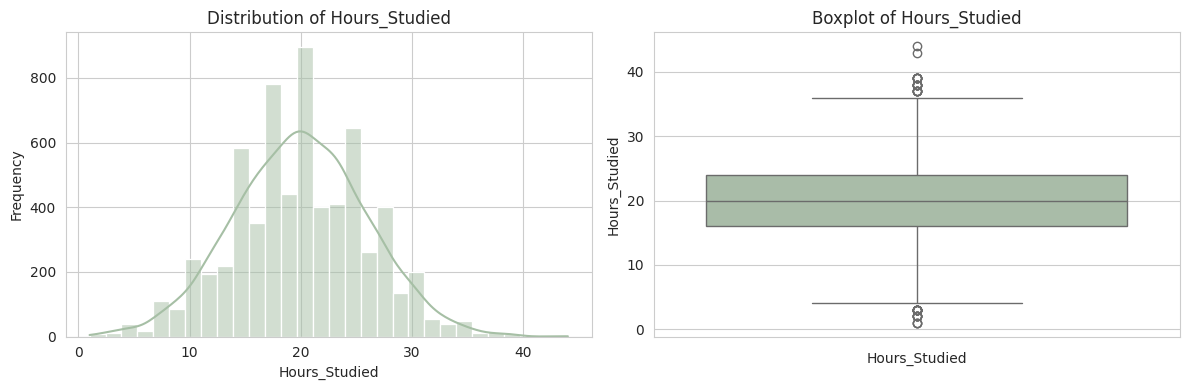

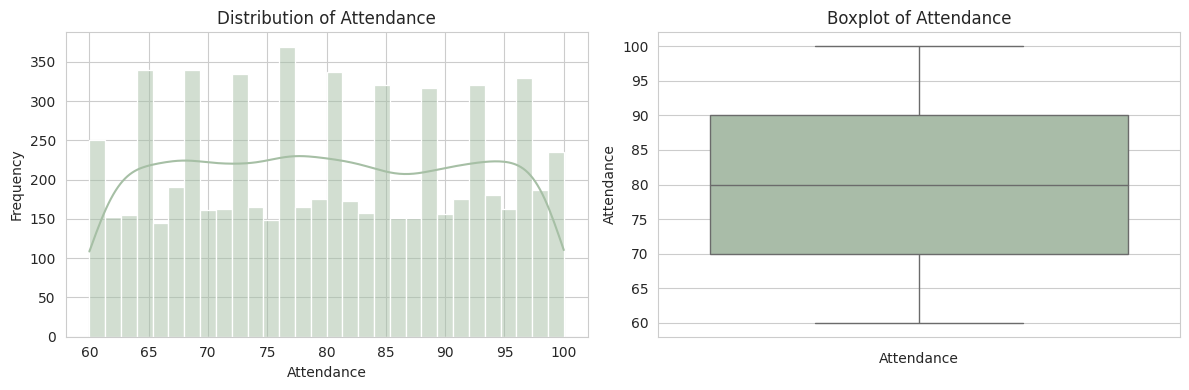

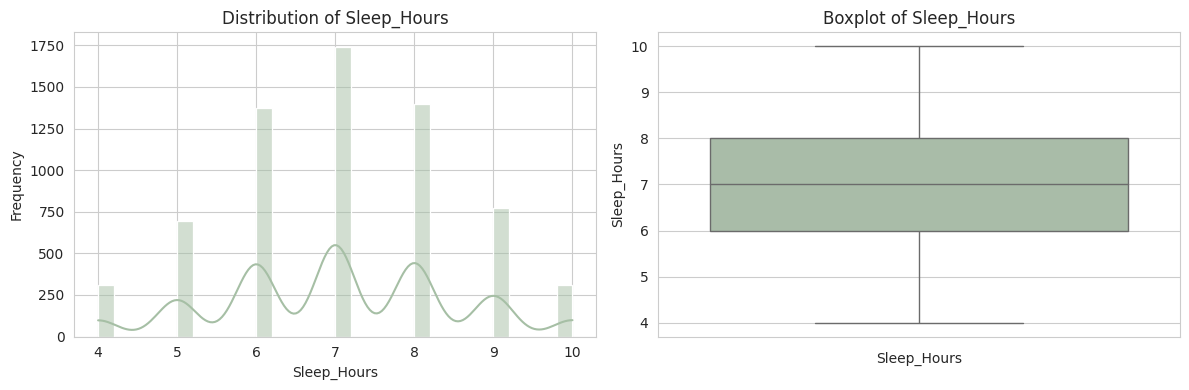

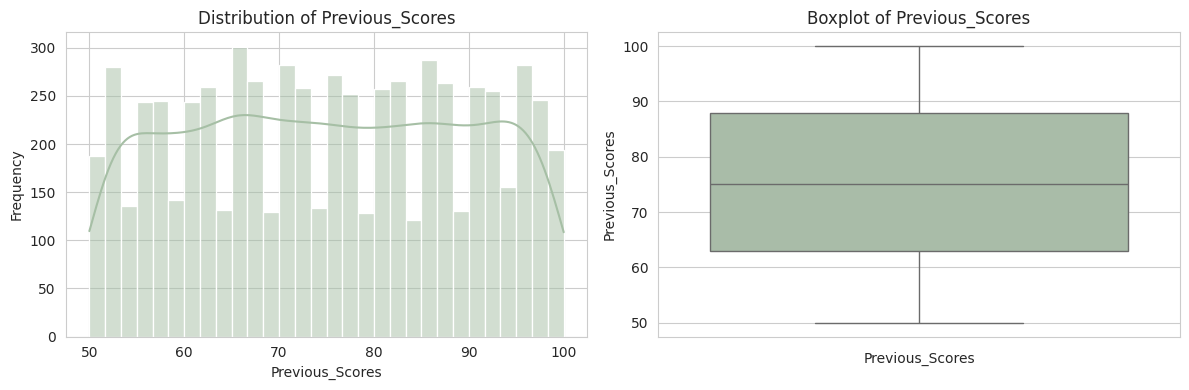

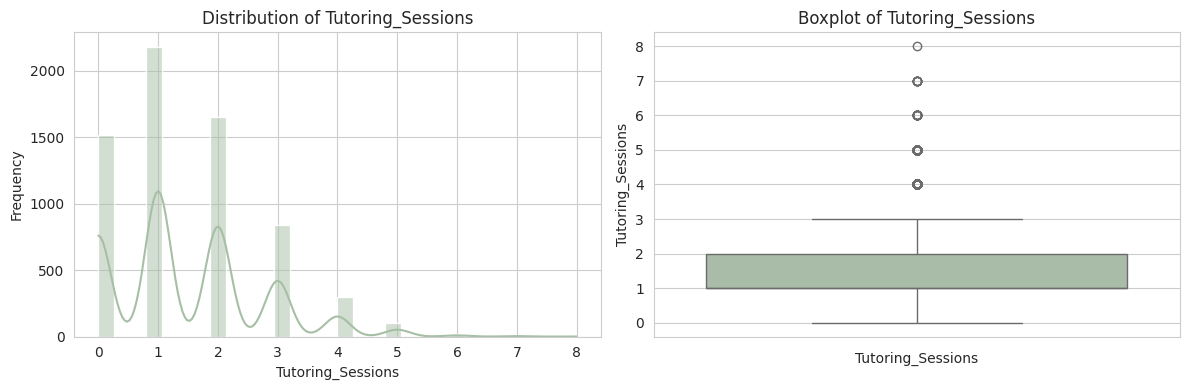

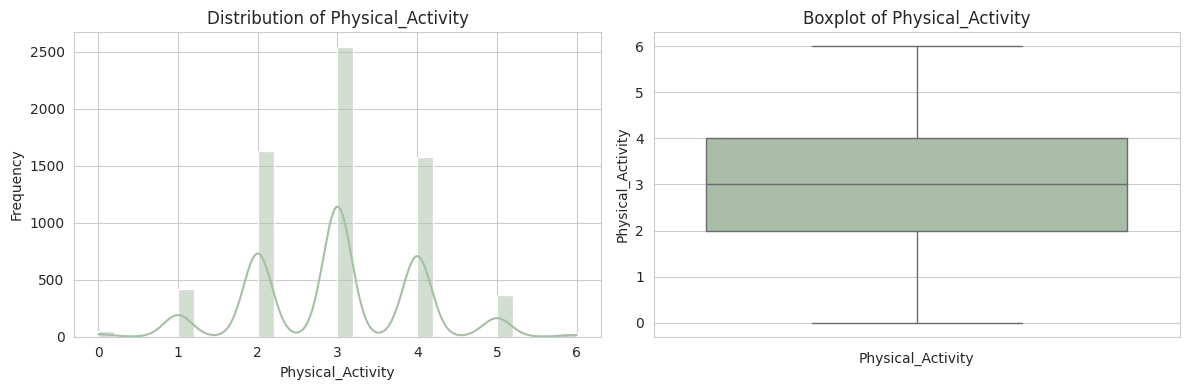

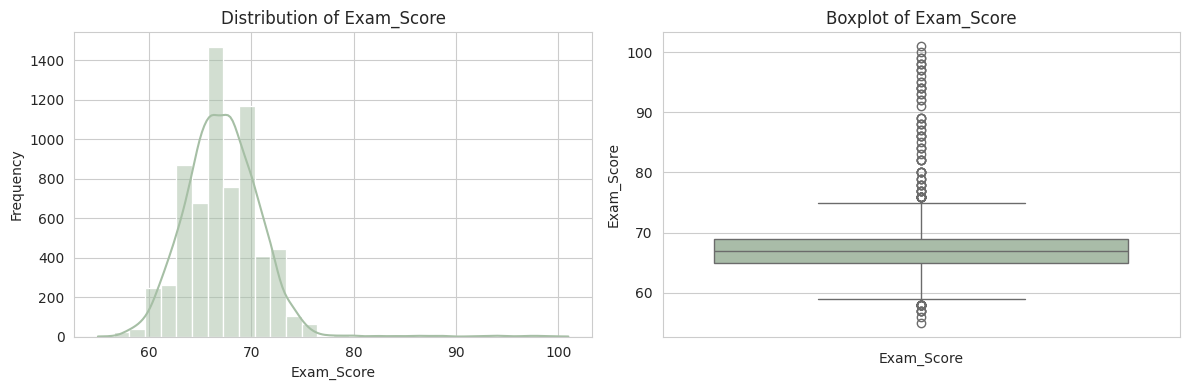

In [36]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram with matching color
    sns.histplot(df[col], kde=True, bins=30, color=(0.651, 0.749, 0.647), ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=12)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot with same theme
    sns.boxplot(y=df[col], color=(0.651, 0.749, 0.647), ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=12)
    axes[1].set_xlabel(col)

    # Clean layout
    plt.tight_layout()
    plt.show()


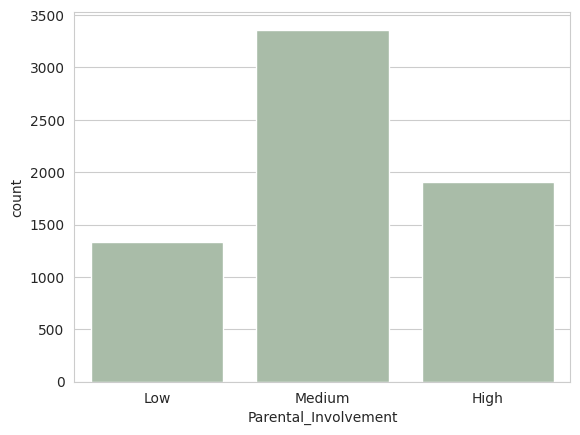

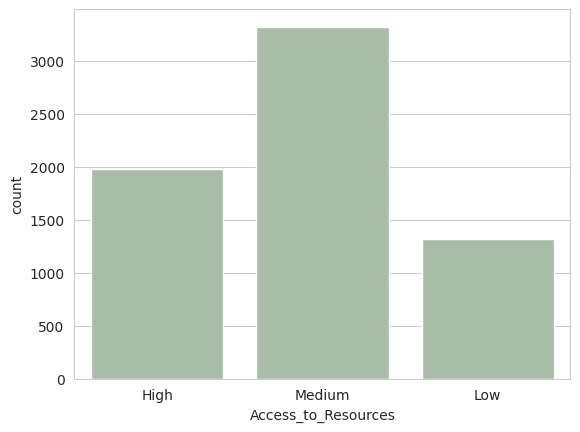

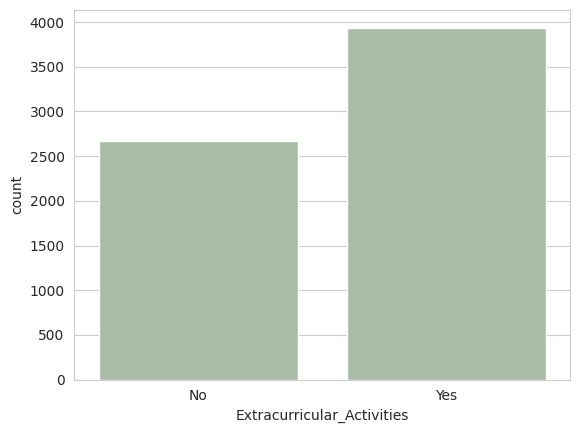

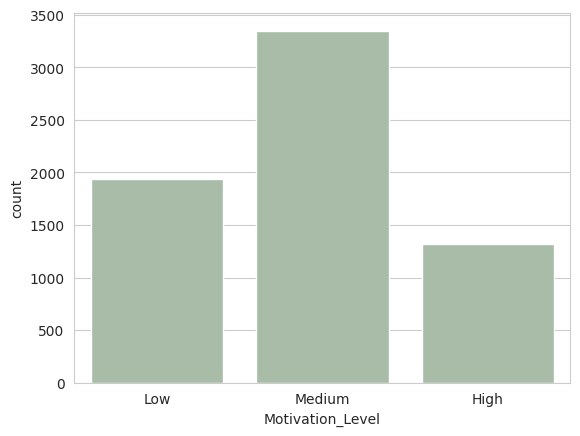

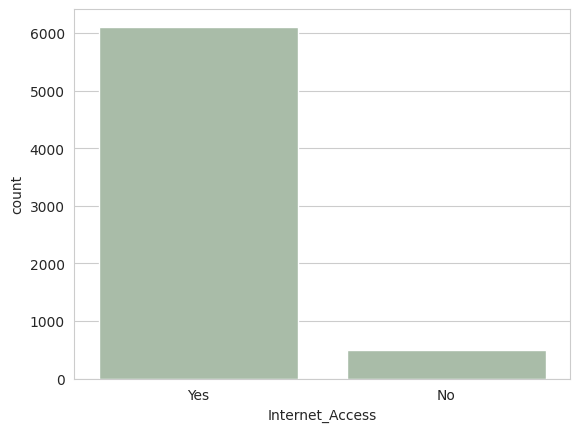

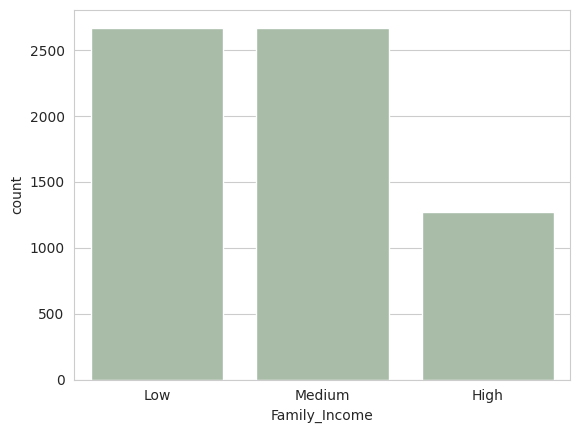

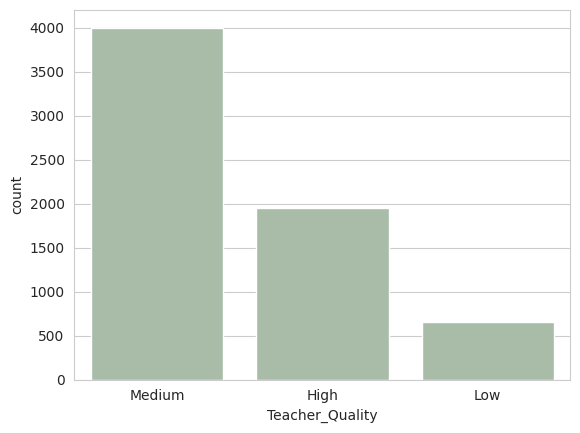

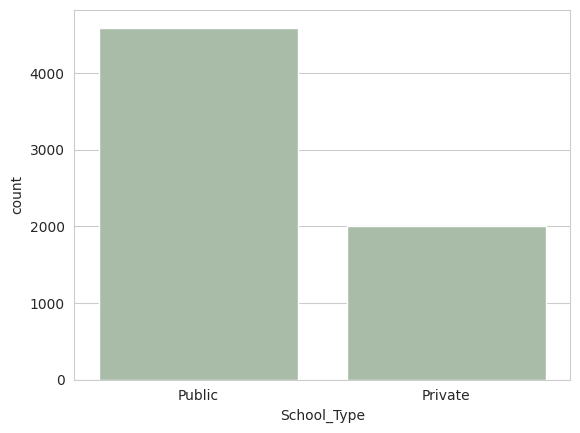

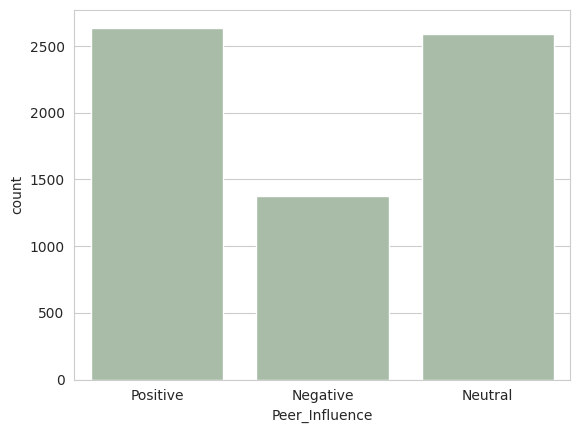

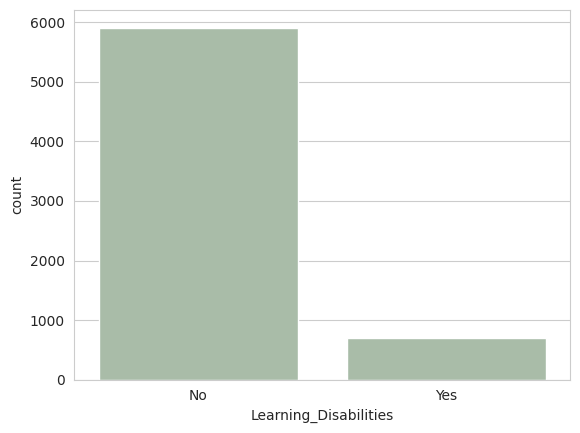

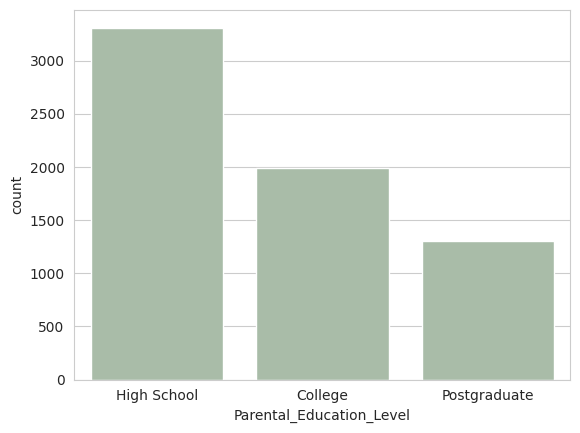

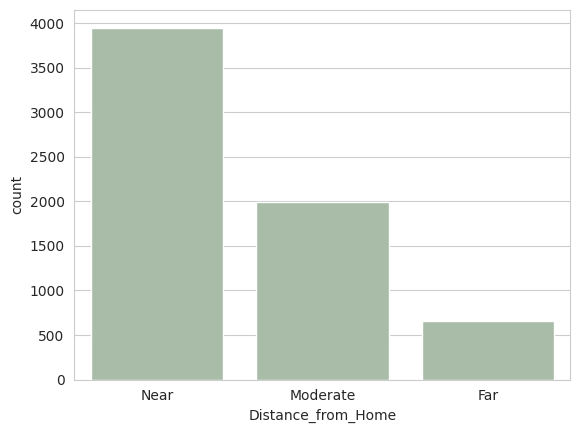

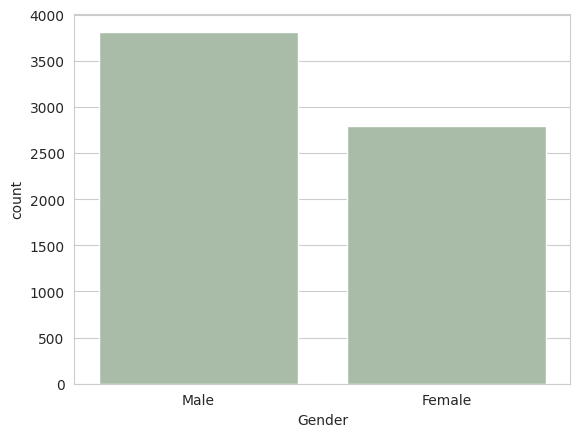

In [37]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df,color=(0.651, 0.749, 0.647))
        plt.show()

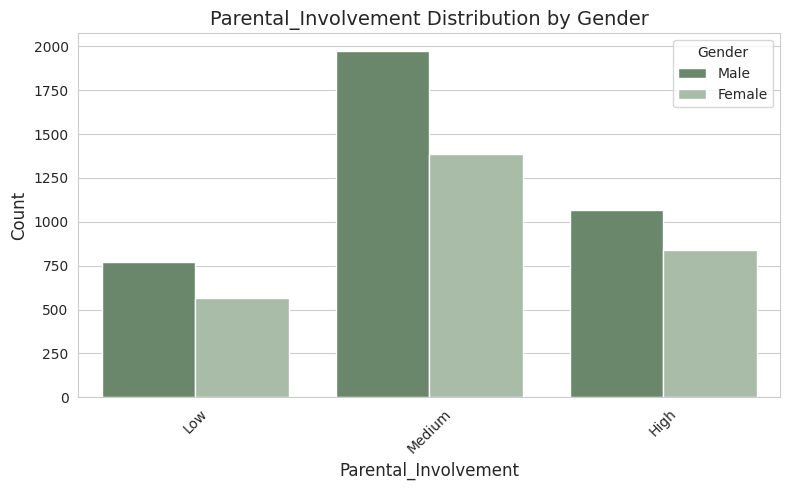

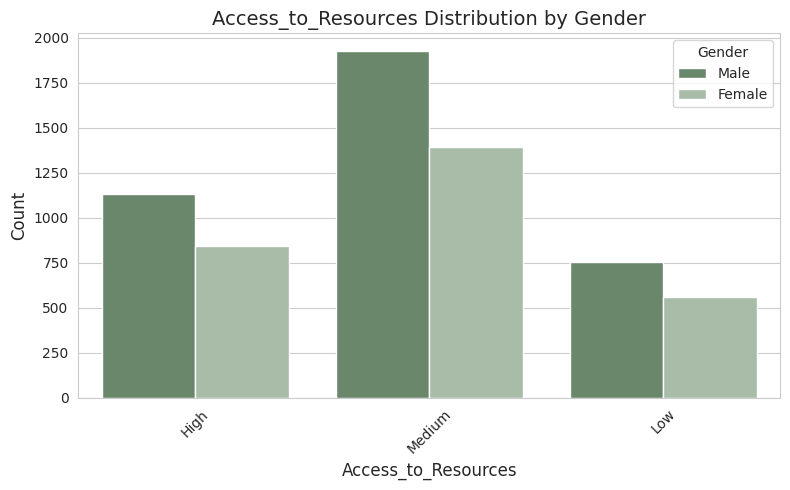

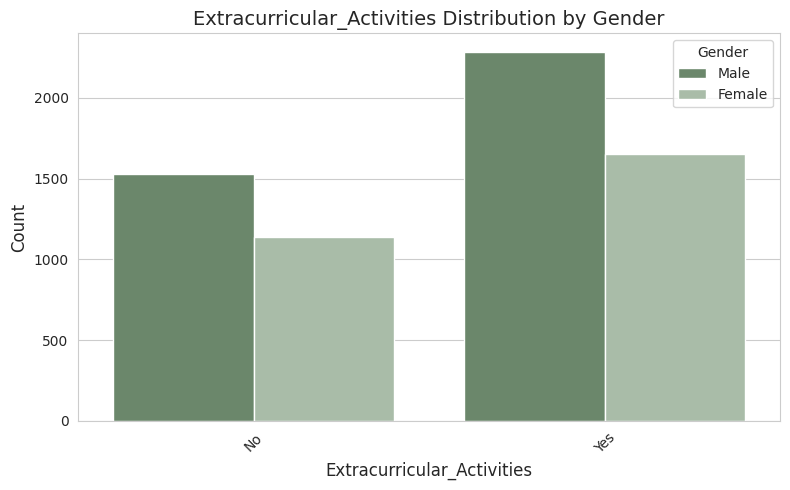

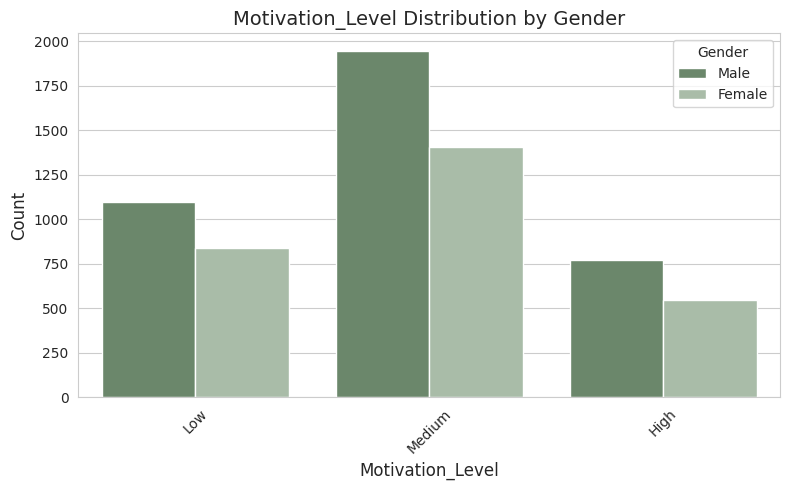

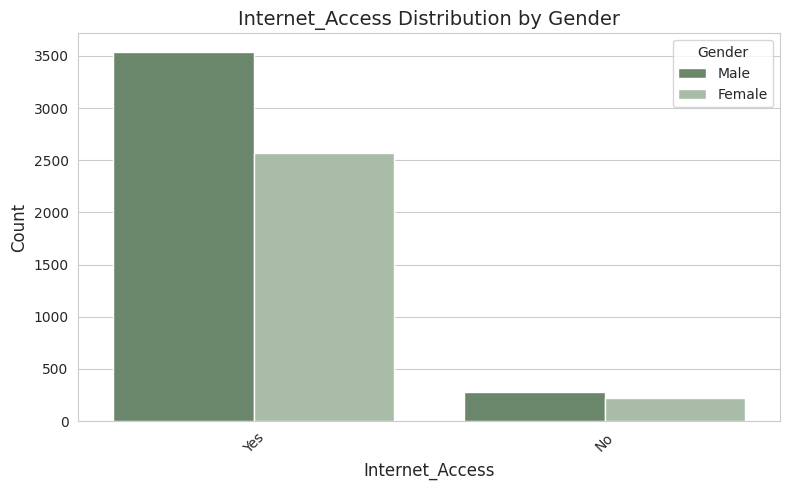

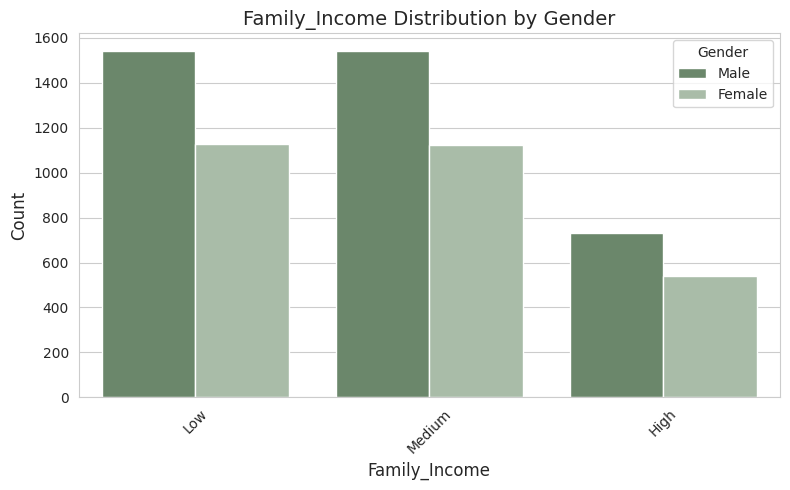

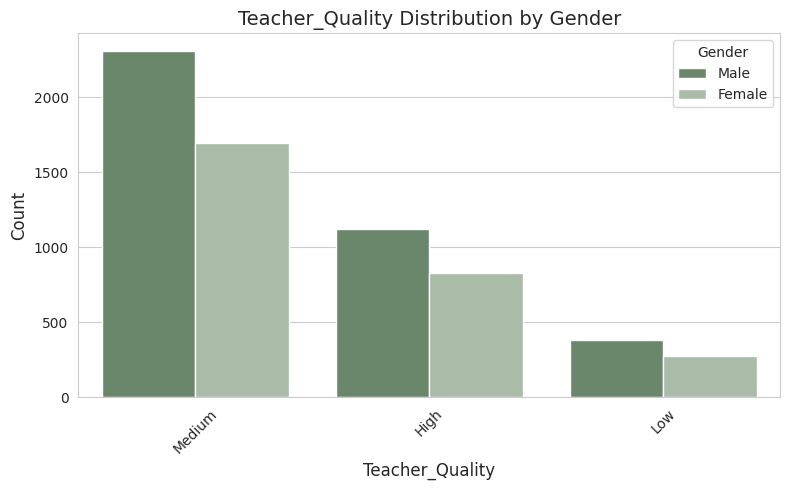

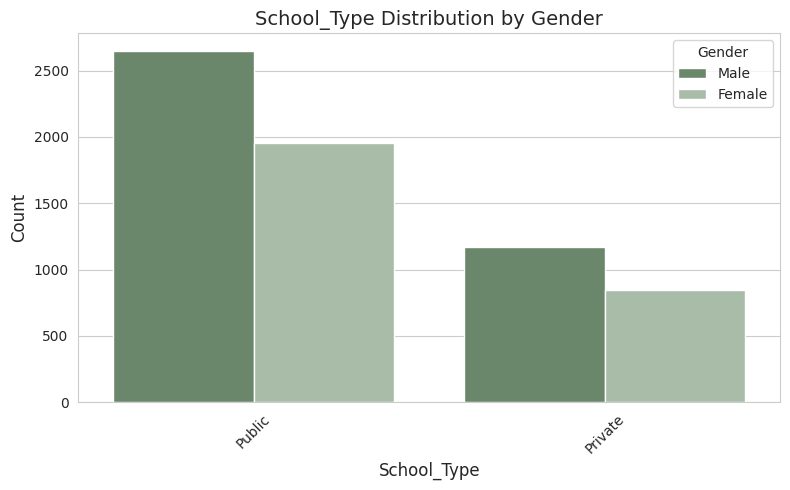

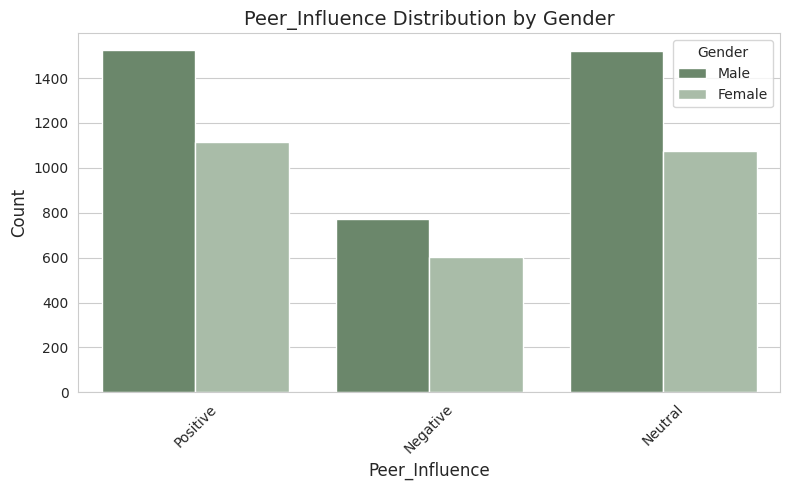

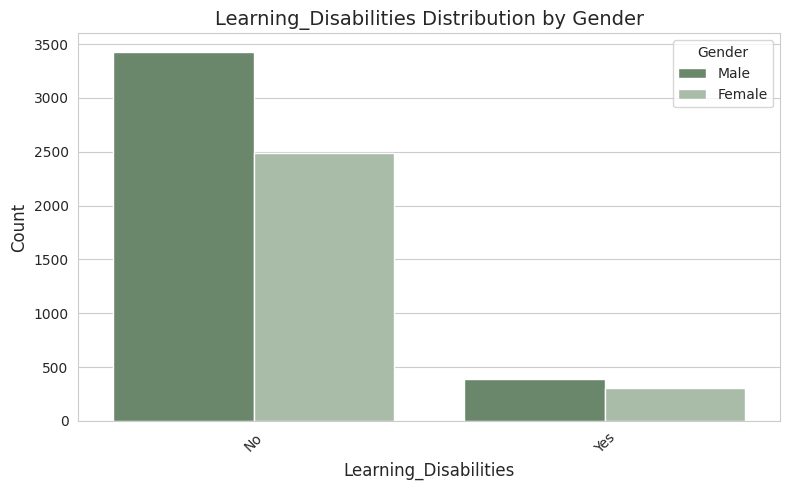

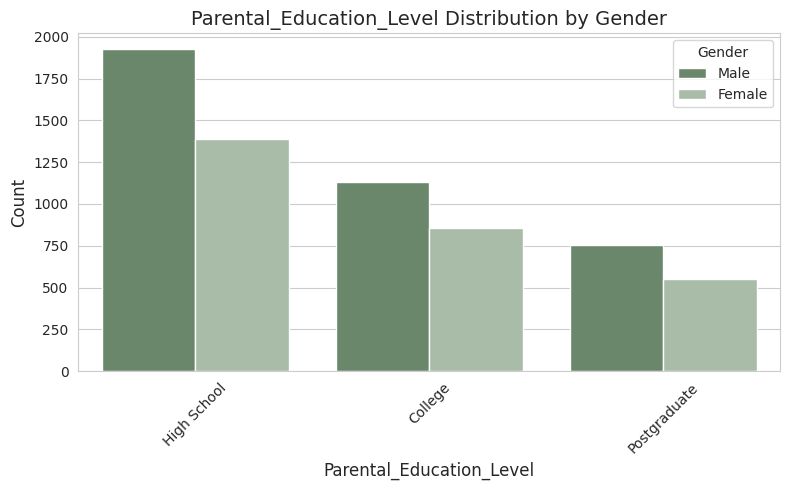

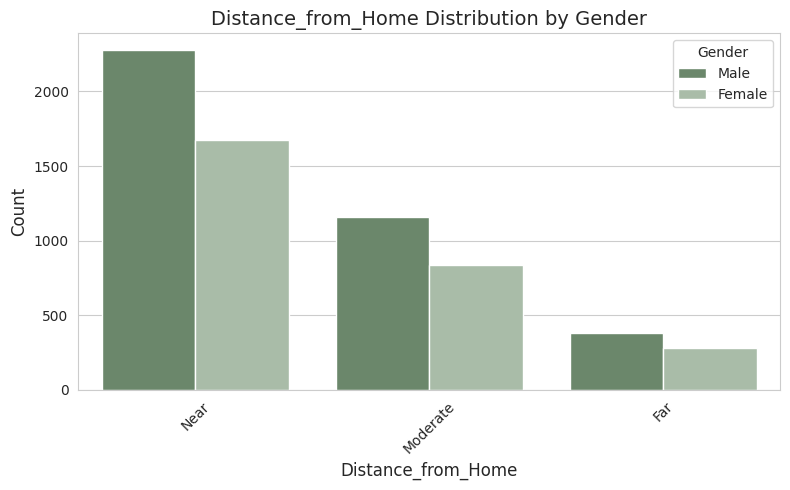

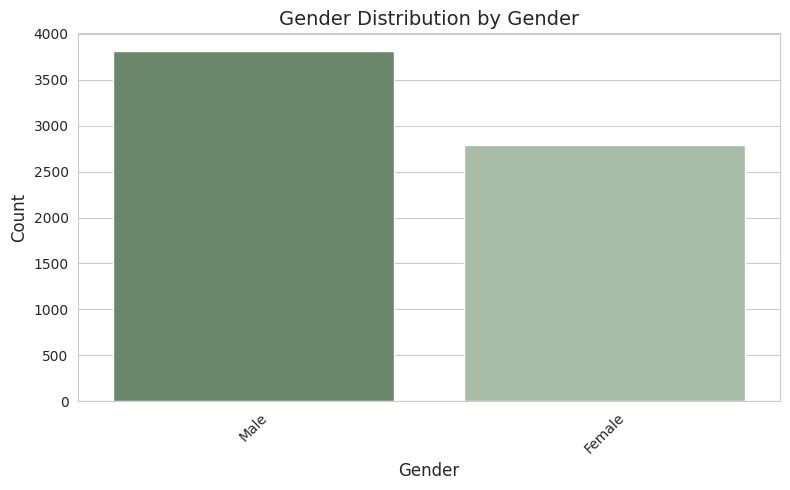

In [38]:
sns.set_style("whitegrid")

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x=col,
        hue='Gender',
        data=df,
        palette=[(0.4, 0.55, 0.4),(0.651, 0.749, 0.647)]  # main color + neutral
    )
    plt.title(f'{col} Distribution by Gender', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


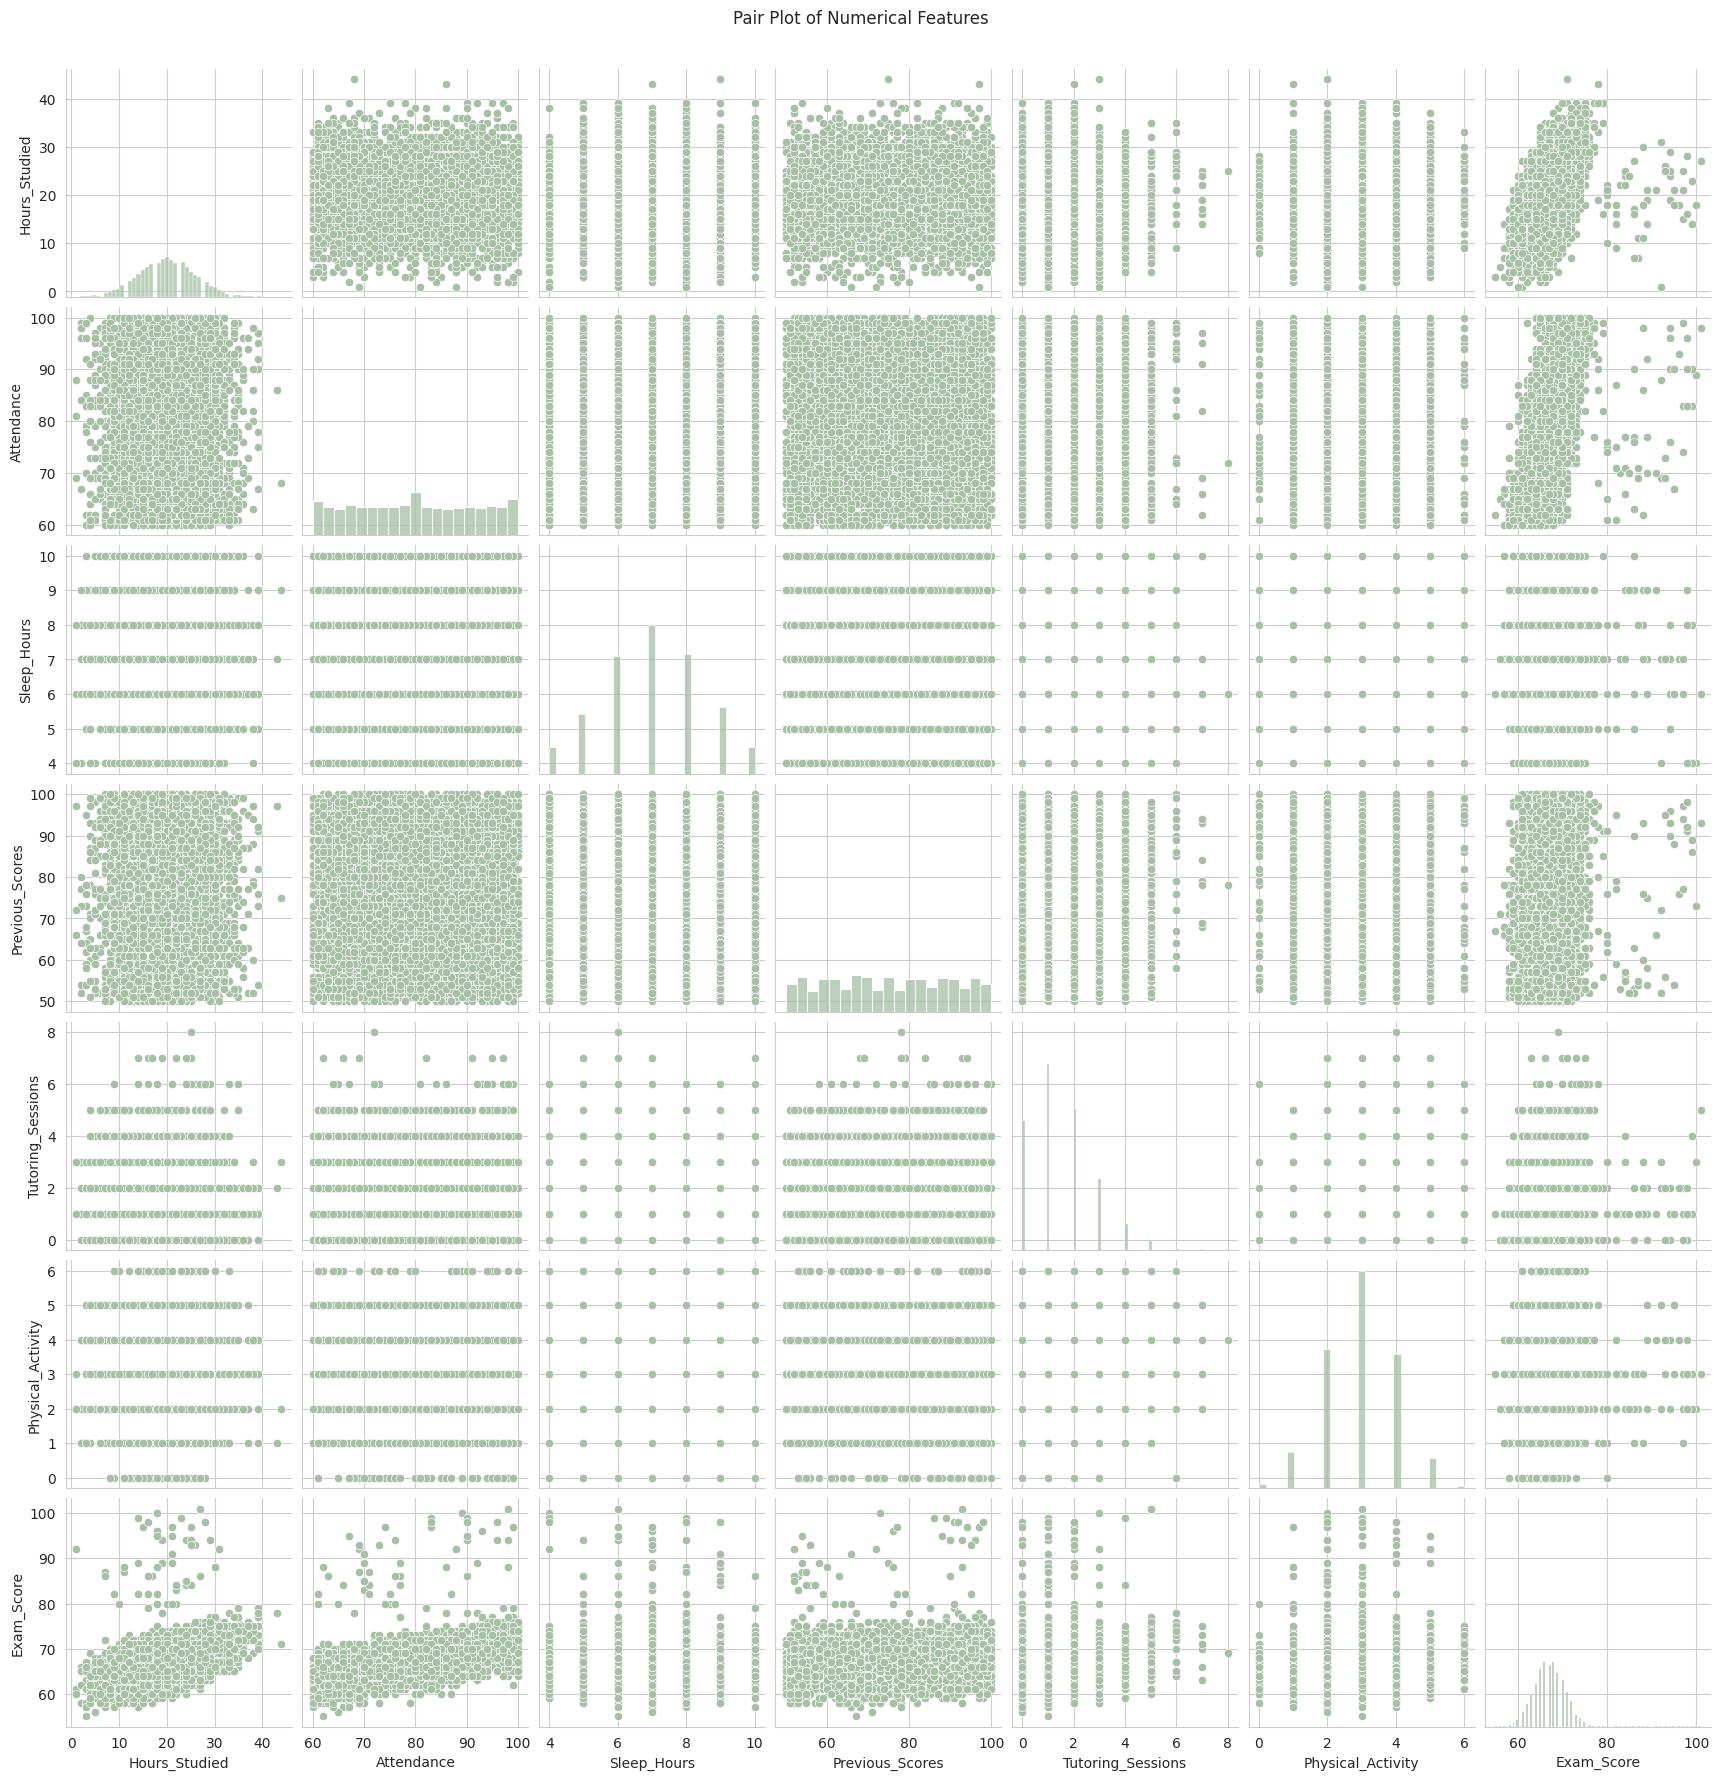

In [39]:
sns.set_style("whitegrid")

sns.pairplot(
    df[numerical_cols],
    plot_kws={'color': (0.651, 0.749, 0.647)},
    diag_kws={'color': (0.651, 0.749, 0.647)}
)

plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


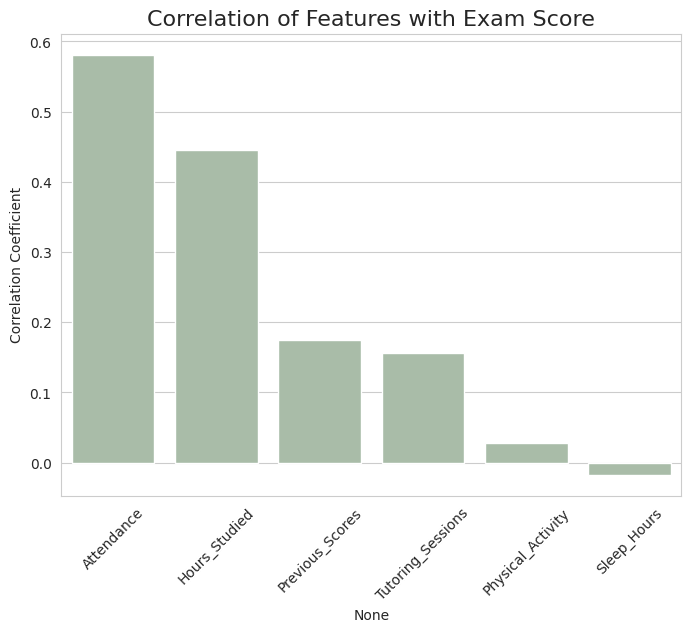

In [43]:
numerical_features = df[numerical_cols]

correlation_with_target = numerical_features.corr()['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, color=(0.651, 0.749, 0.647))
plt.title('Correlation of Features with Exam Score', fontsize=16)
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df,
                 x="Hours_Studied",
                 y="Exam_Score",
                 color="Attendance",
                 color_continuous_scale="Viridis",
                 title="Study Hours and Attendance on Exam")

fig.update_layout(width=600, height=500,template='plotly_white',title_x=0.5)
fig.show()

atg = df.groupby("Attendance")["Exam_Score"].mean()

###Data Preprocessing

In [15]:
# Applying One Hot Encoding to convert categoical data into numerical data

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [16]:
# Removing outliers from dataset based on the Z-score method

df_before_outliers = df.copy()

z = np.abs((df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std())

threshold = 3
df = df[(z < threshold).all(axis=1)].copy()


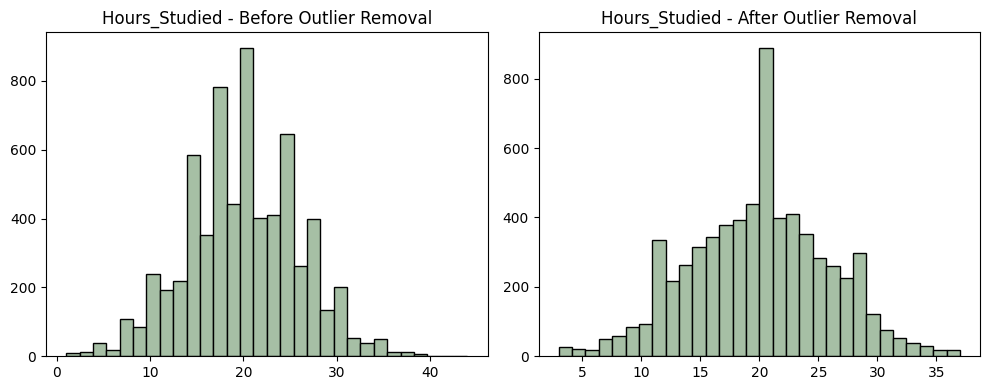

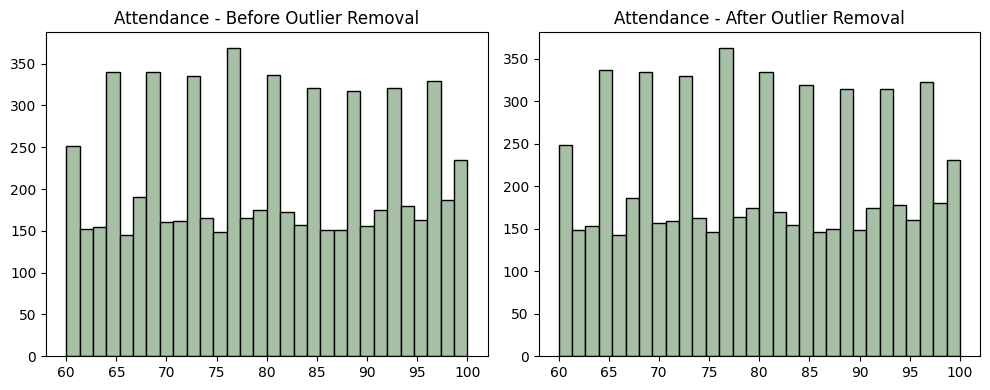

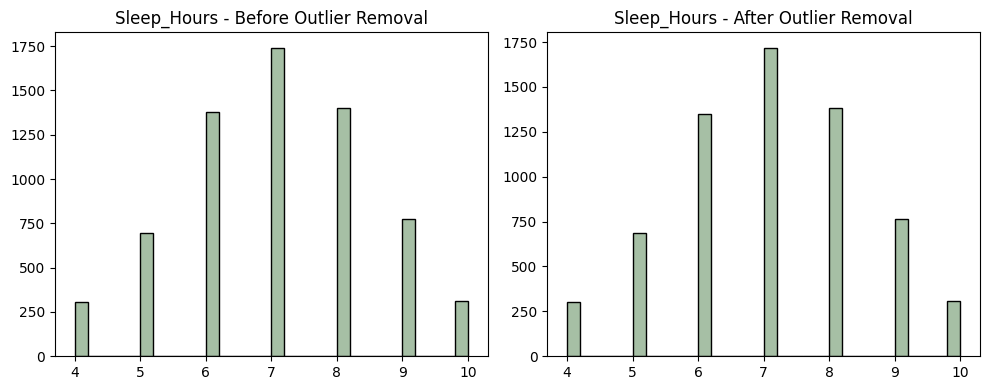

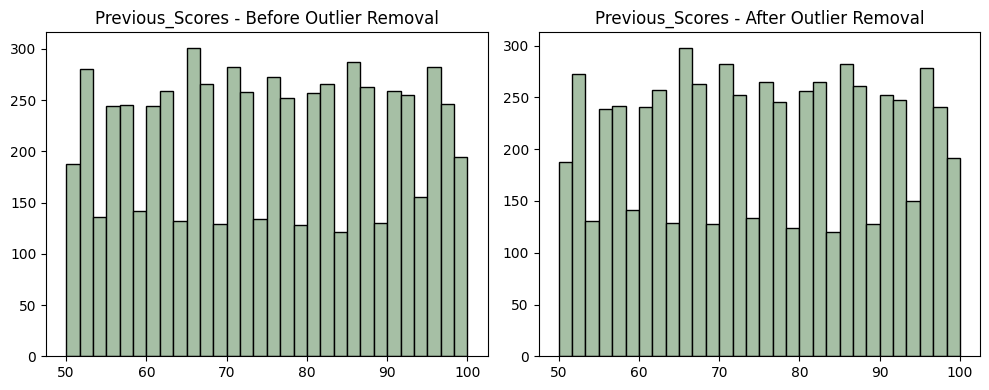

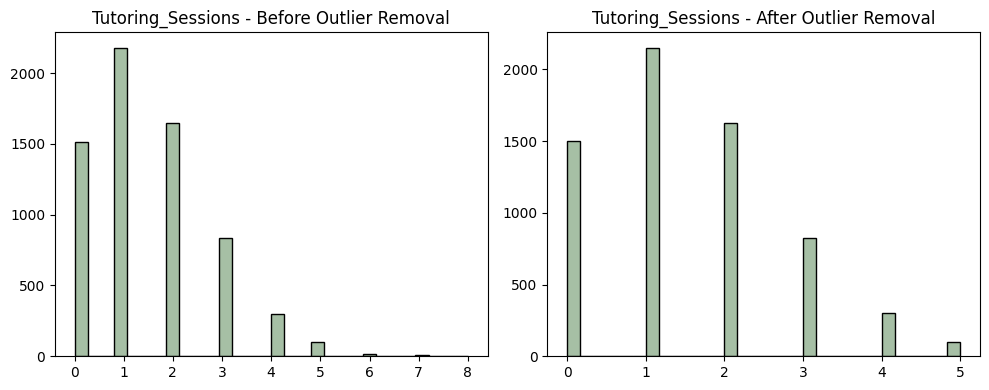

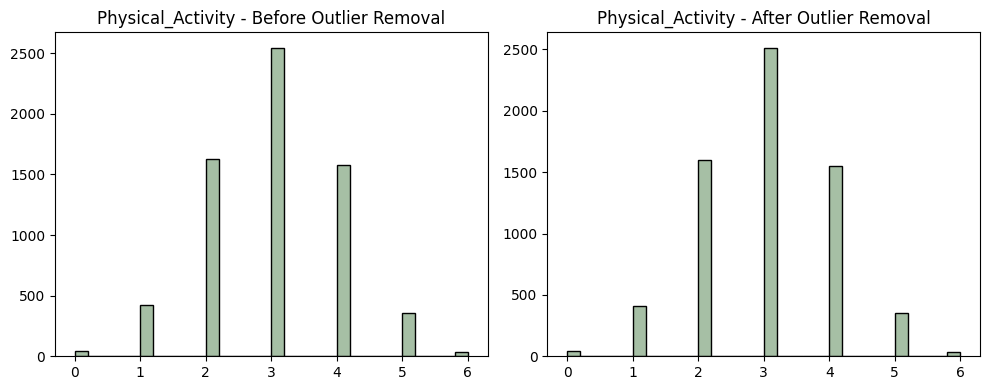

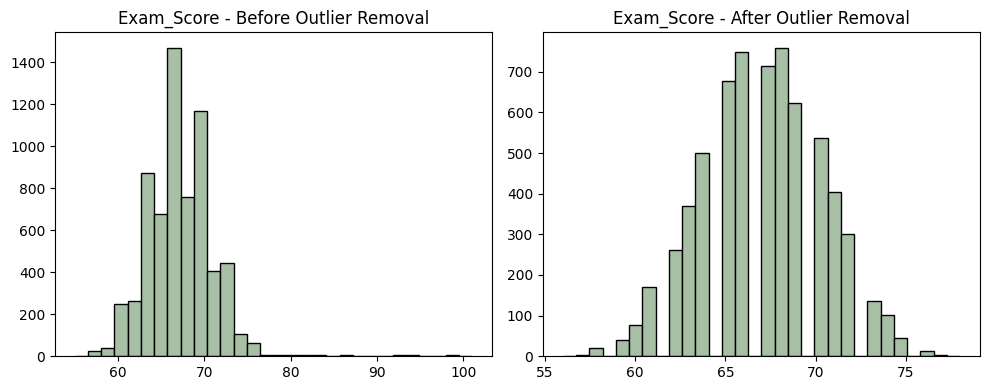

In [21]:
for col in numerical_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

    ax1.hist(df_before_outliers[col], bins=30, edgecolor='black',color=(0.651, 0.749, 0.647))
    ax1.set_title(f"{col} - Before Outlier Removal")

    ax2.hist(df[col], bins=30, edgecolor='black',color=(0.651, 0.749, 0.647))
    ax2.set_title(f"{col} - After Outlier Removal")

    plt.tight_layout()
    plt.show()

###Train, Test & Split

In [17]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Model Training

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

###Model Evaluation

In [21]:
lr_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)

print(f"R2 Score = {lr_r2}")

R2 Score = 0.9900866487691816


In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean()}")


Cross-validation R² scores: [0.99023538 0.97046695 0.99004266 0.99000182 0.98980897]
Mean CV R²: 0.9861111561725282


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)

print(f"MAE = {mae}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

MAE = 0.2687001802483114
MSE = 0.10387764084145072
RMSE = 0.3223005442773107


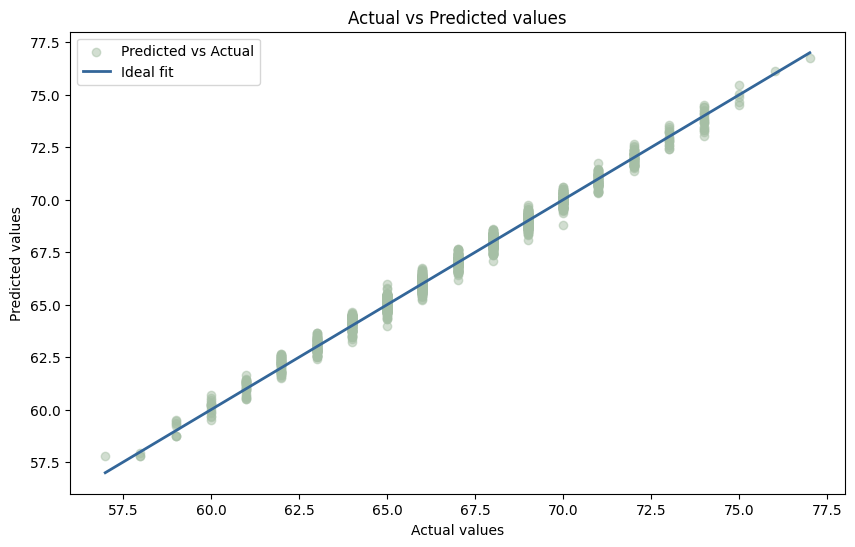

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color=(0.651, 0.749, 0.647), alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color=(0.2, 0.4, 0.6), linewidth=2, label='Ideal fit')  # dark blue line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()



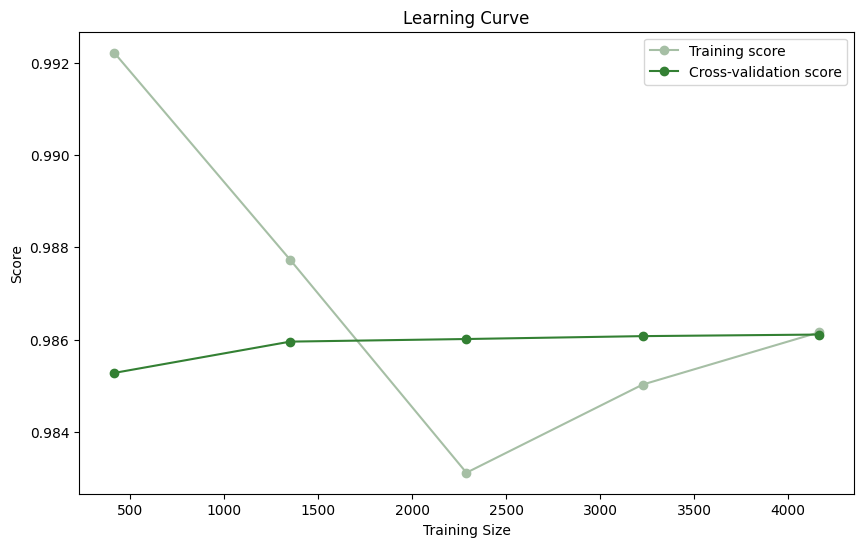

In [26]:
#Plot for learning curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score',
         color=(0.651, 0.749, 0.647), marker='o')  # soft green
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score',
         color=(0.2, 0.5, 0.2), marker='o')  # dark green
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})
print(comparison_df.head(10))

      Actual  Predicted
3452      73  72.952676
4995      66  66.529499
4901      65  65.442359
3495      66  66.318681
97        68  68.314450
3416      69  68.630610
4288      72  72.536986
5651      65  64.333961
6296      66  65.657161
3071      71  71.024055
